In [2]:
import torch
from torch.utils.data import DataLoader
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
from src.dataset import PascalPartDataset

In [3]:
df_train_paths = pd.DataFrame({'PATH_TO_IMAGE': [], 'PATH_TO_MASK': []})
df_val_paths = pd.DataFrame({'PATH_TO_IMAGE': [], 'PATH_TO_MASK': []})

# extract names of images and masks for train and val splts
splits = ["train_id", "val_id"]
splits_samples = {}

for split in splits:
    with open(f'/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/hierarchical_segmentation/data/{split}.txt') as f:
        splits_samples[split] = f.read().splitlines()

path_to_raw = '/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part/Pascal-part'

# create dataframes with full paths to images and masks
df_train_paths['PATH_TO_IMAGE'] = [f'{path_to_raw}/JPEGImages/{id_img}.jpg' for id_img in splits_samples['train_id']]
df_train_paths['PATH_TO_MASK'] = [f'{path_to_raw}/gt_masks/{id_mask}.npy' for id_mask in splits_samples['train_id']]
df_val_paths['PATH_TO_IMAGE'] = [f'{path_to_raw}/JPEGImages/{id_img}.jpg' for id_img in splits_samples['val_id']]
df_val_paths['PATH_TO_MASK'] = [f'{path_to_raw}/gt_masks/{id_mask}.npy' for id_mask in splits_samples['val_id']]

In [7]:
transform = A.Compose([
        A.Resize(256, 256),
        # A.Normalize(
        #     mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225],
        #     # max_pixel_value=255.0,
        # ),
        # ToTensorV2()
    ])

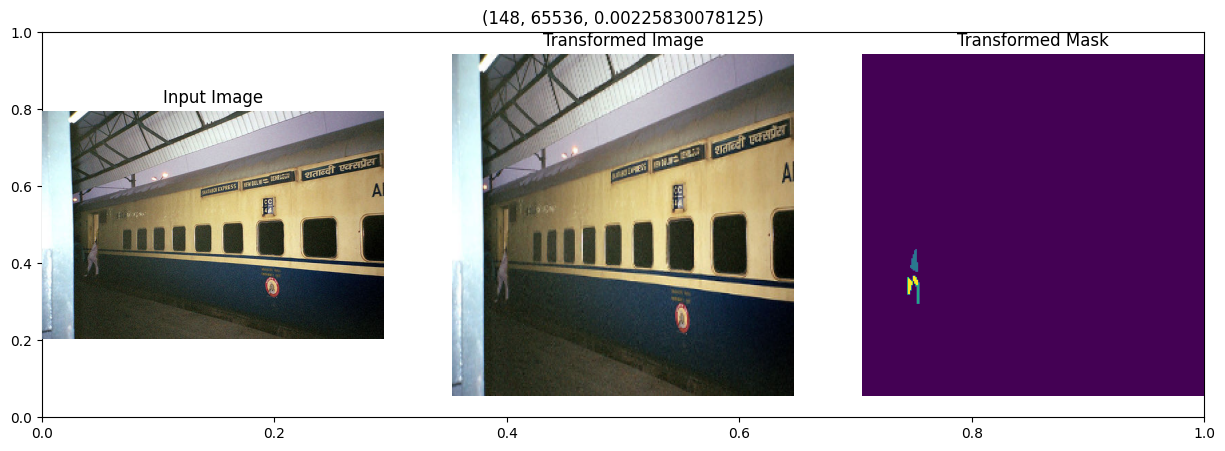

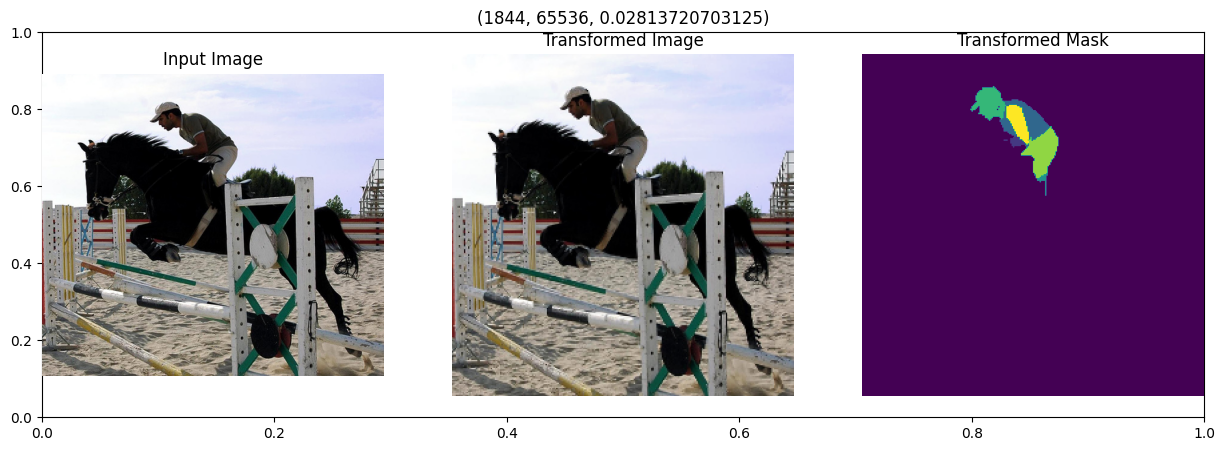

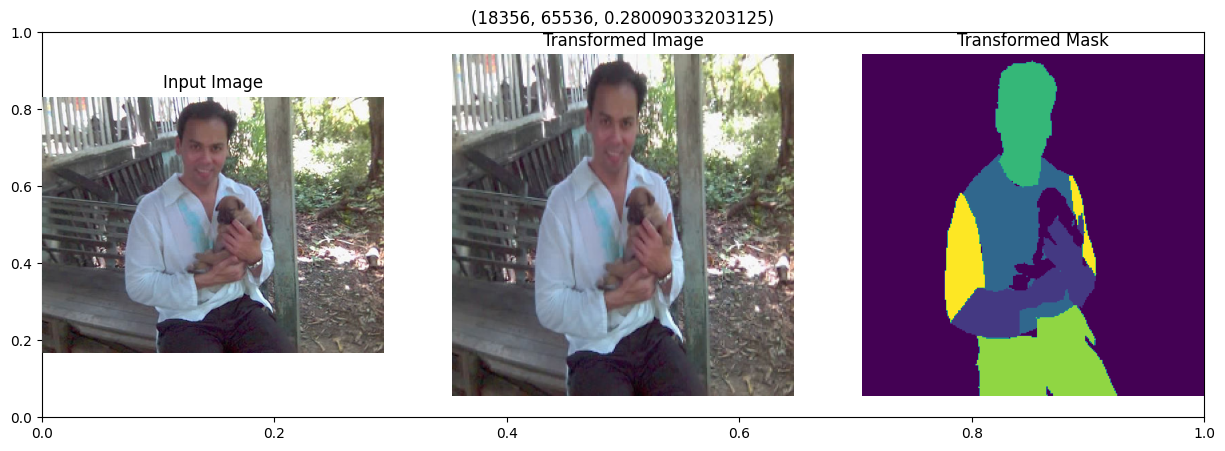

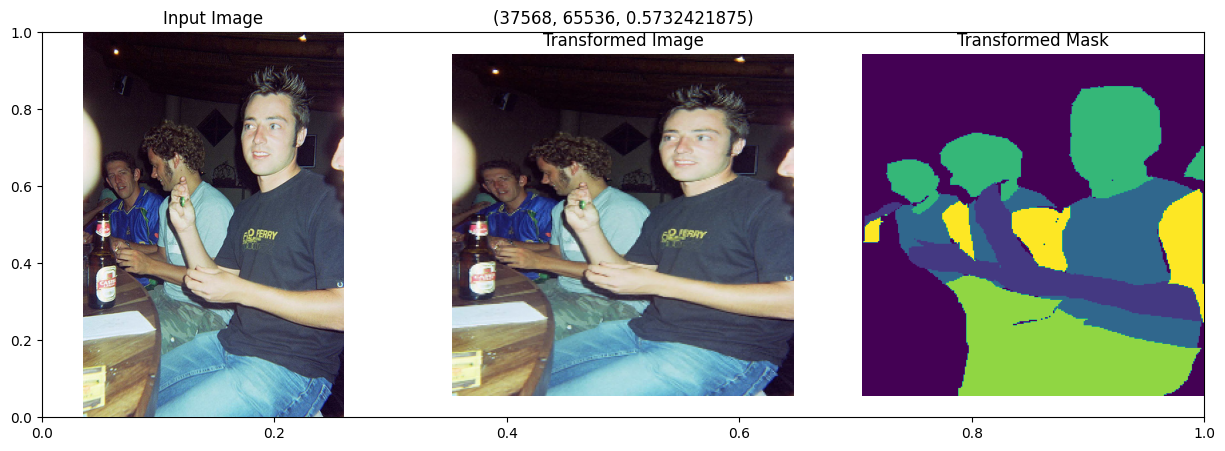

In [10]:
for i in range(len(df_train_paths)):
    path_image, path_mask = df_train_paths.iloc[i].values
    
    # Load the mask
    mask = np.load(path_mask)

    # Load the image
    image = cv2.imread(path_image)
    # Convert image to RGB tesnsor
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # apply transforms
    transformed = transform(image=image, mask=mask)
    mask = transformed['mask']
    # print((mask > 0).sum(), (mask > -1).sum(), (mask > 0).sum()/(mask > -1).sum())

    plt.figure(figsize=(15, 5))
    plt.title(f'{(mask > 0).sum(), (mask > -1).sum(), (mask > 0).sum()/(mask > -1).sum()}')
    
    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Transformed Image')
    plt.imshow(transformed['image'])
    plt.axis('off')

    
    plt.subplot(1, 3, 3)
    plt.title('Transformed Mask')
    plt.imshow(transformed['mask'])
    plt.axis('off')


    
    if i > 2:
        break


In [11]:
root_augmented_data = f'/storage/AIDA_PROJECTS/egor.koptelov/MIL_test_task/Pascal-part'

In [13]:
count = 0

for i in range(len(df_train_paths)):
    path_image, path_mask = df_train_paths.iloc[i].values
    
    # Load the mask
    mask = np.load(path_mask)

    # Load the image
    image = cv2.imread(path_image)
    # Convert image to RGB tesnsor
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # apply transforms
    # transformed = transform(image=image, mask=mask)
    # trf_mask = transformed['mask']
    # trf_image = transformed['image']

    image_id = path_image.split('/')[-1]
    mask_id = path_mask.split('/')[-1]
    
    mask_area = (mask > 0).sum()
    image_area = (mask > -1).sum()
    mask_ratio = mask_area / image_area

    if mask_ratio >= 0.02:
        # save augmented image
        cv2.imwrite(f'{root_augmented_data}/big_mask_samples/JPEGImages/{image_id}', image)
        # save augmented mask
        np.save(f'{root_augmented_data}/big_mask_samples/gt_masks/{mask_id}', mask)

        count +=1

    


In [16]:
print(count, df_train_paths.shape)

2415 (2826, 2)


In [17]:
count = 0

for i in range(len(df_val_paths)):
    path_image, path_mask = df_train_paths.iloc[i].values
    
    # Load the mask
    mask = np.load(path_mask)

    # Load the image
    image = cv2.imread(path_image)
    # Convert image to RGB tesnsor
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # apply transforms
    # transformed = transform(image=image, mask=mask)
    # trf_mask = transformed['mask']
    # trf_image = transformed['image']

    image_id = path_image.split('/')[-1]
    mask_id = path_mask.split('/')[-1]
    
    mask_area = (mask > 0).sum()
    image_area = (mask > -1).sum()
    mask_ratio = mask_area / image_area

    if mask_ratio >= 0.02:
        # save augmented image
        cv2.imwrite(f'{root_augmented_data}/big_mask_samples/JPEGImages/{image_id}', image)
        # save augmented mask
        np.save(f'{root_augmented_data}/big_mask_samples/gt_masks/{mask_id}', mask)

        count +=1

print(count, df_val_paths.shape)


656 (707, 2)
